In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

Untitled1.ipynb      diabetes.csv         white-wine.csv
auto.csv             gm_2008_region.csv   winequality-red.csv
boston.csv           house-votes-84.csv


# Preprocessing

## clean categorical data

In [96]:
gapminder = pd.read_csv('gm_2008_region.csv')
gapminder.head()

population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific

In [97]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


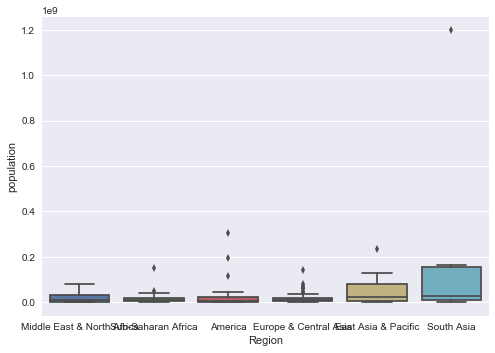

In [98]:
sns.boxplot(gapminder['Region'], gapminder['population'])

In [99]:
gapminder_region = pd.get_dummies(gapminder)
print(gapminder_region.shape)
gapminder_region.head()

(139, 15)


population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality  Region_America  Region_East Asia & Pacific  \
0             29.5               0                           0   
1            192.0               0                           0   
2             15.4               1                           0   
3             20.0               0                           0   
4              5.2               0                           1   

   Region_Europe & Central Asia  Region_Middle East & North Africa  \
0                             0                                  1   
1                             0                                  0   
2                             0                                  0   
3                             1                                  0   
4                             0                                  0   

   Region_South Asia  Region_Sub-Saharan Africa  
0                  0                          0  
1                  0                          1  
2                  0                          0  
3                  0                          0  
4                  0                          0

In [100]:
# gapminder_region2 regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X = gapminder_region.drop('life', axis=1)
y = gapminder_region['life'].copy()

ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)

print(ridge_cv)

[ 0.87032259  0.80383219  0.83638426  0.77857442  0.87021336]


## handling missing data
* recode with np.nan
* drop
* impute

In [10]:
vote_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

votes = pd.read_csv('house-votes-84.csv', header=None, 
                    names=vote_names)
votes.head()

party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   
2    democrat       ?     y      y         ?        y         y         n   n   
3    democrat       n     y      y         n        ?         y         n   n   
4    democrat       y     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y        ?         y         y     y                 n   
1       n           n        n         y         y     y                 n   
2       n           n        y         n         y     y                 n   
3       n           n        y         n         y     n                 n   
4       n           n        y         ?         y     y                 y   

  eaa_rsa  
0       y  
1       ?  
2       n  
3       y  
4       y

In [11]:
votes.replace({'n': 0, 'y':1, '?':np.nan}, inplace=True)

In [12]:
np.sum(pd.isnull(votes))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [13]:
print(votes.shape)
print(votes.dropna().shape)
     # too many rows lost, cannot use this approach

(435, 17)
(232, 17)


In [14]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

imp = Imputer(missing_values='NaN', 
              strategy='most_frequent',
              axis=0)
clf = SVC()

steps = [('imputation', imp), 
         ('SVM', clf)]

pipeline = Pipeline(steps)

In [15]:
X = votes.drop('party', axis=1)
y = votes['party'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



## scaling and centering

In [16]:
w_wine = pd.read_csv('white-wine.csv')
w_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [17]:
w_wine.describe().loc[['mean', 'std', 'min', '50%', 'max'],:]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       6.854788          0.278241     0.334192        6.391415   0.045772   
std        0.843868          0.100795     0.121020        5.072058   0.021848   
min        3.800000          0.080000     0.000000        0.600000   0.009000   
50%        6.800000          0.260000     0.320000        5.200000   0.043000   
max       14.200000          1.100000     1.660000       65.800000   0.346000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            35.308085            138.360657  0.994027  3.188267   
std             17.007137             42.498065  0.002991  0.151001   
min              2.000000              9.000000  0.987110  2.720000   
50%             34.000000            134.000000  0.993740  3.180000   
max            289.000000            440.000000  1.038980  3.820000   

      sulphates    alcohol   quality  
mean   0.489847  10.514267  5.877909  
std    0.114126   1.230621  0.885639  
min    0.220000   8.000000  3.000000  
50%    0.470000  10.400000  6.000000  
max    1.080000  14.200000  9.000000

In [18]:
X = w_wine.drop('quality', axis=1)
y = w_wine.quality >= 6.0

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print(knn_scaled.score(X_test, y_test))
print(knn_unscaled.score(X_test, y_test))

0.770068027211
0.697959183673


In [20]:
type(pipeline)

sklearn.pipeline.Pipeline

# pieces together

## pipeline for classification
preprocessing ->> model ->> hyper_params_tuning ->> splitting ->> fit_predict_scoring

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = w_wine.drop('quality', axis=1)
y = w_wine.quality >= 6.0

steps = [('scaler', StandardScaler()), 
         ('SVM', SVC())]

pipeline = Pipeline(steps)

params = {'SVM__C': [1, 10, 100], 
          'SVM__gamma': [0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=21)

cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.best_score_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'SVM__C': 10, 'SVM__gamma': 0.1}
0.792751403777
0.779591836735
             precision    recall  f1-score   support

      False       0.67      0.63      0.65       318
       True       0.83      0.85      0.84       662

avg / total       0.78      0.78      0.78       980



## pipeline for regression  
preprocessing ->> model ->> hyper_params_tuning ->> splitting ->> fit_predict_scoring

In [22]:
X = gapminder_region2.drop('life', axis=1)
y = gapminder_region2['life']

In [25]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

steps = [('imp', Imputer(missing_values='NaN', 
                         strategy='mean', 
                         axis=0)
         ), 
         ('scaler', StandardScaler()), 
         ('elasticnet', ElasticNet(max_iter=10000))]

pipeline = Pipeline(steps)

params = {'elasticnet__l1_ratio': np.linspace(0, 1, 30)}

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)
cv = GridSearchCV(pipeline, params, cv=3)

In [26]:
cv.fit(X_train, y_train)

/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Use

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'elasticnet__l1_ratio': array([ 0.     ,  0.03448,  0.06897,  0.10345,  0.13793,  0.17241,
        0.2069 ,  0.24138,  0.27586,  0.31034,  0.34483,  0.37931,
        0.41379,  0.44828,  0.48276,  0.51724,  0.55172,  0.58621,
        0.62069,  0.65517,  0.68966,  0.72414,  0.75862,  0.7931 ,
        0.82759,  0.86207,  0.89655,  0.93103,  0.96552,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
cv.best_params_

{'elasticnet__l1_ratio': 1.0}

In [28]:
cv.score(X_test, y_test)

0.88620165497710346

# models recap

## knn on votes

In [56]:
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

imp = Imputer(missing_values='NaN', 
              strategy='most_frequent',
              axis=0)
knn = KNeighborsClassifier()
steps = [('imp', imp),
         ('knn', knn)]
ppl = Pipeline(steps)

X = imp.fit_transform(votes.iloc[:, 1:].copy())
y = votes.iloc[:, 0].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)

params = {'knn__n_neighbors': range(1, 16)}
cv = GridSearchCV(ppl, param_grid=params, cv=5)

In [57]:
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 6}
0.931034482759
             precision    recall  f1-score   support

   democrat       0.96      0.94      0.95       115
 republican       0.89      0.92      0.90        59

avg / total       0.93      0.93      0.93       174



In [55]:
ppl.get_params().keys() # a list of available parameters
                        # param.keys() should be within it

dict_keys(['imp__missing_values', 'steps', 'knn__p', 'knn__metric_params', 'knn', 'knn__n_neighbors', 'knn__algorithm', 'imp__strategy', 'imp__verbose', 'imp', 'knn__leaf_size', 'imp__axis', 'imp__copy', 'knn__n_jobs', 'knn__metric', 'knn__weights'])

## knn on digits dataset

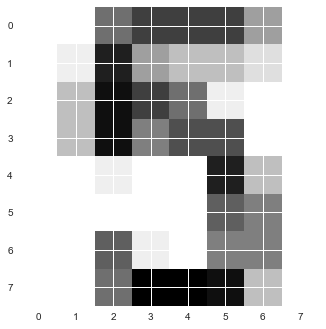

In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
plt.imshow(digits.images[1010], 
           cmap=plt.cm.gray_r, 
           interpolation='nearest')


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y # spl base on this var
                                                   )

knn = KNeighborsClassifier()

params = {'n_neighbors':range(1, 11)}

cv = GridSearchCV(knn, param_grid=params, cv=5)

In [75]:
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'n_neighbors': 1}
0.986111111111
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       0.92      1.00      0.96        36
          2       1.00      1.00      1.00        35
          3       1.00      1.00      1.00        37
          4       0.97      1.00      0.99        36
          5       1.00      1.00      1.00        37
          6       1.00      1.00      1.00        36
          7       1.00      1.00      1.00        36
          8       0.97      0.91      0.94        35
          9       1.00      0.94      0.97        36

avg / total       0.99      0.99      0.99       360



In [79]:
cv.cv_results_

{'mean_fit_time': array([ 0.00386996,  0.00245547,  0.00196614,  0.00209532,  0.00221362,
         0.00190501,  0.00211072,  0.00207849,  0.00220561,  0.00208635]),
 'mean_score_time': array([ 0.04132581,  0.0354702 ,  0.03858681,  0.03614583,  0.03984513,
         0.03853073,  0.03936782,  0.03692398,  0.03803   ,  0.03797841]),
 'mean_test_score': array([ 0.99025748,  0.98329854,  0.9881698 ,  0.98469033,  0.98677801,
         0.98399443,  0.97912317,  0.97912317,  0.97912317,  0.97703549]),
 'mean_train_score': array([ 1.        ,  0.99095088,  0.99338961,  0.99060487,  0.98990967,
         0.98851624,  0.98764576,  0.98694814,  0.98642686,  0.98503524]),
 'param_n_neighbors': masked_array(data = [1 2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors'

In [80]:
cv.cv_results_['mean_test_score']

array([ 0.99025748,  0.98329854,  0.9881698 ,  0.98469033,  0.98677801,
        0.98399443,  0.97912317,  0.97912317,  0.97912317,  0.97703549])

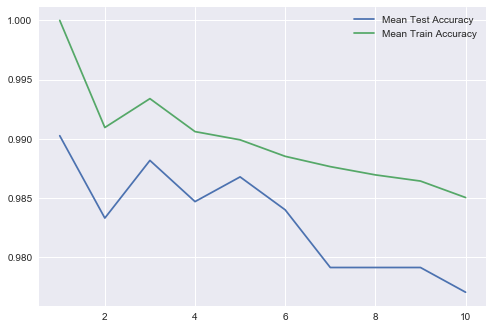

In [81]:
plt.plot(range(1,11), cv.cv_results_['mean_test_score'], 
         label='Mean Test Accuracy')
plt.plot(range(1,11), cv.cv_results_['mean_train_score'], 
         label='Mean Train Accuracy')
plt.legend()

In [76]:
cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
cv.best_score_

0.99025748086290888

## linear model , PCA and CV on gapminder

In [128]:
gapminder = gapminder_region
gapminder.shape

(139, 15)

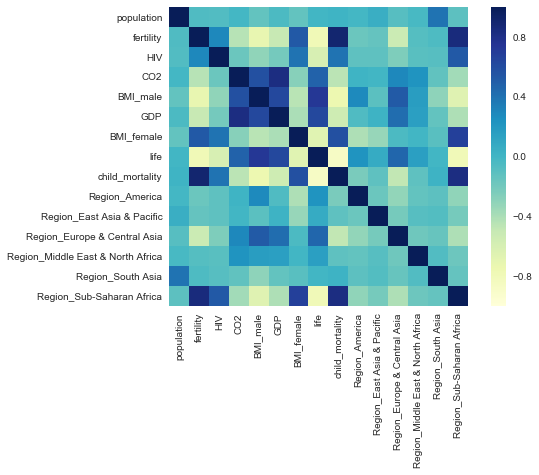

In [102]:
sns.heatmap(gapminder.corr(), square=True, cmap="YlGnBu")

In [214]:
X = gapminder.drop('life', axis=1)
y = gapminder['life']

In [116]:
np.mean(X, axis=0)

population                           3.549977e+07
fertility                            3.005108e+00
HIV                                  1.915612e+00
CO2                                  4.459874e+00
BMI_male                             2.462305e+01
GDP                                  1.663878e+04
BMI_female                           1.267019e+02
child_mortality                      4.509712e+01
Region_America                       1.942446e-01
Region_East Asia & Pacific           1.007194e-01
Region_Europe & Central Asia         2.949640e-01
Region_Middle East & North Africa    7.194245e-02
Region_South Asia                    5.035971e-02
Region_Sub-Saharan Africa            2.877698e-01
dtype: float64

### linear regression without PCA

In [122]:
# linear regression without PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size=0.3, 
                                               random_state=42)

reg = linear_model.LinearRegression()   # instantiate model
reg.fit(X_train, y_train)                    # fit model

y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.821941993959
3.40524811574


In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

reg = linear_model.LinearRegression()
cv_score = cross_val_score(reg, X, y, cv=5)
    # here, cv is to simply reduce randomness resulted in splitting
    # training and testing sets

print(cv_score)

cv_score2 = cross_val_score(reg, X, y, cv=5, 
                            scoring = make_scorer(mean_squared_error))
print(np.sqrt(cv_score2))

print('Average 5-fold R^2: {}'.format(np.mean(cv_score)))
print('Average 5-fold RMSE: {}'.format(np.mean(np.sqrt(cv_score2))))

[ 0.8196741   0.80301541  0.89758712  0.80425614  0.94015848]
[ 3.29965679  3.95413067  3.07575151  3.70643278  2.53094308]
Average 5-fold R^2: 0.852938249424021
Average 5-fold RMSE: 3.31338296750794


### linear regression with PCA intrinsic dimension

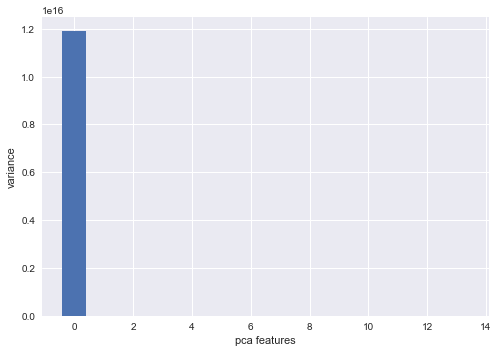

In [119]:
# find intrinsic dimension of gapminder
    # pca with no scaling
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X)

xticks = range(pca.n_components_)
plt.bar(xticks, pca.explained_variance_)
plt.xlabel('pca features')
plt.ylabel('variance')

([<matplotlib.axis.XTick at 0x1187776a0>,
 <a list of 14 Text xticklabel objects>)

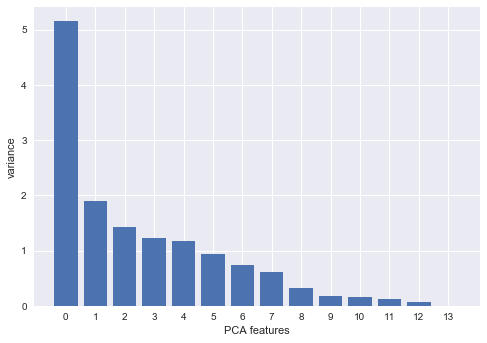

In [120]:
# find intrinsic dimension of gapminder
    # pca with scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)

In [125]:
# find intrinsic dimension of gapminder
    # pca with scaling
scaler = StandardScaler()
pca = PCA(n_components=7)

ppl = Pipeline([('scaler', scaler), 
                ('pca', pca)])

pca_features = ppl.fit_transform(X)

print(pca_features.shape)
print(X.shape)

(139, 7)
(139, 14)


In [137]:
# linear regression on PCA intrinsic dimensions without CV

X_train, X_test, y_train, y_test = train_test_split(pca_features, y,
                                               test_size=0.3, 
                                               random_state=42)

reg = linear_model.LinearRegression()   # instantiate model
reg.fit(X_train, y_train)                    # fit model

y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.72195393621
4.25526277386


In [138]:
# linear regression on PCA intrinsic dimensions with CV

reg = linear_model.LinearRegression()
cv_score = cross_val_score(reg, pca_features, y, cv=5)

print(cv_score)

cv_score2 = cross_val_score(reg, pca_features, y, cv=5, 
                            scoring = make_scorer(mean_squared_error))
print(np.sqrt(cv_score2))

print('Average 5-fold R^2: {}'.format(np.mean(cv_score)))
print('Average 5-fold RMSE: {}'.format(np.mean(np.sqrt(cv_score2))))

[ 0.79436394  0.80516167  0.83186384  0.70862466  0.87182169]
[ 3.52362231  3.93253037  3.94098262  4.52208217  3.70414799]
Average 5-fold R^2: 0.8023671615834221
Average 5-fold RMSE: 3.924673090930071


Comparing cross-validation metrics values of linear regression on original data and on PCA intrinsic dimensions, we can confidently say that R^2 shrinks and RMSE increase, thus using PCA intrinsic dimensions as predictors here wouldn't lead to better result.  

### lasso regression and cv for feature selection
* loss function = OLS loss func + $\alpha * \sum_{i=1}^n |a_i|$
* great for feature selection

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587  0.          0.          0.          0.          0.         -0.        ]


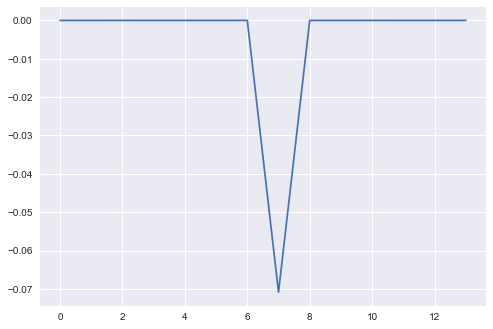

In [146]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.4, normalize=True)
ls.fit(X, y)

print(ls.coef_)

plt.plot(range(X.shape[1]), ls.coef_)

At alpha=0.4, lasso regressor thinks 'child_mortality' is the most important feature when prediction life expectancy.

In [147]:
# lasso regression and cv scores
ls = Lasso(alpha=0.4, normalize=True)
cv_score = cross_val_score(ls, X, y, cv=5)

print(cv_score)

cv_score2 = cross_val_score(ls, X, y, cv=5, 
                            scoring = make_scorer(mean_squared_error))
print(np.sqrt(cv_score2))

print('Average 5-fold R^2: {}'.format(np.mean(cv_score)))
print('Average 5-fold RMSE: {}'.format(np.mean(np.sqrt(cv_score2))))

[ 0.71832994  0.51162234  0.4717075   0.61637071  0.43607937]
[ 4.12391839  6.22605257  6.98572012  5.18881191  7.76944604]
Average 5-fold R^2: 0.5508219727279344
Average 5-fold RMSE: 6.058789804907827


> Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.  

Well, indeed, lasso don't offer great predictive power.

### ridge regression and cv

In [149]:
# ridge regression and cv scores
from sklearn.linear_model import Ridge

rg = Ridge(alpha=0.1, normalize=True)
cv_score = cross_val_score(rg, X, y, cv=5)

print(cv_score)

cv_score2 = cross_val_score(rg, X, y, cv=5, 
                            scoring = make_scorer(mean_squared_error))
print(np.sqrt(cv_score2))

print('Average 5-fold R^2: {}'.format(np.mean(cv_score)))
print('Average 5-fold RMSE: {}'.format(np.mean(np.sqrt(cv_score2))))

[ 0.8386549   0.81728026  0.88137977  0.7949875   0.92172272]
[ 3.12117136  3.80826904  3.31019323  3.79316926  2.89466921]
Average 5-fold R^2: 0.8508050274863479
Average 5-fold RMSE: 3.385494420802283


### elastic net and hyperparameter tuning

> Remember lasso and ridge regression?  

> Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the **elastic net**. In elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:$$a∗L1+b∗L2$$  
  
> In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of 1 corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.  

Use GridSearchCV to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. Use a hold-out set to evaluate your model's performance.

In [215]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

els = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)

l1_space = np.linspace(0, 1, 30)
params_grid = {'l1_ratio': l1_space}

cv = GridSearchCV(els, params_grid, cv=5)
cv.fit(X_train, y_train)

print(cv.best_params_)

y_pred = cv.predict(X_test)

r2 = cv.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)

/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Use

{'l1_ratio': 0.0}
0.869741636715
3.13656611545


/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## knn on diabetes with multi eval metrics

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [152]:
diabetes.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [169]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)
# ppl with scaler
ppl = Pipeline([('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())
               ])

params = {'knn__n_neighbors':range(1, 11)}
cv = GridSearchCV(ppl, param_grid=params, cv=5)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 6}
0.717532467532
[[176  30]
 [ 57  45]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.60      0.44      0.51       102

avg / total       0.70      0.72      0.70       308



In [170]:
# ppl with no scaler
ppl = Pipeline([
                ('knn', KNeighborsClassifier())
               ])

params = {'knn__n_neighbors':range(1, 11)}
cv = GridSearchCV(ppl, param_grid=params, cv=5)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 9}
0.717532467532
[[168  38]
 [ 49  53]]
             precision    recall  f1-score   support

          0       0.77      0.82      0.79       206
          1       0.58      0.52      0.55       102

avg / total       0.71      0.72      0.71       308



## logreg on diabetes with multi-eval and CV hyperparam tuning

### multi evaluation metrics

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) # y_pred at threshold 0.5

print(logreg.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.744897959184
[[ 300  339]
 [ 161 1160]]
             precision    recall  f1-score   support

      False       0.65      0.47      0.55       639
       True       0.77      0.88      0.82      1321

avg / total       0.73      0.74      0.73      1960



In [173]:
logreg.get_params().keys()

dict_keys(['max_iter', 'intercept_scaling', 'fit_intercept', 'verbose', 'tol', 'random_state', 'multi_class', 'C', 'solver', 'penalty', 'class_weight', 'dual', 'warm_start', 'n_jobs'])

> most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. 

### ROC and AUC

In [174]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

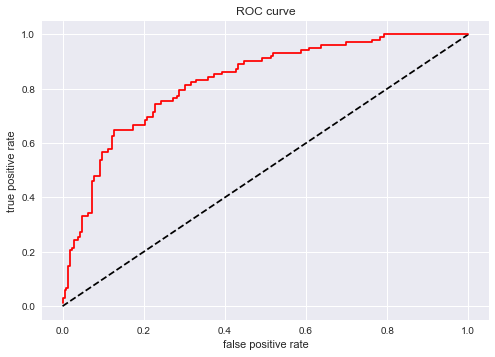

In [178]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, c='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

In [182]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print('5-fold AUC: {}'.format(cv_auc))

AUC: 0.8268608414239483
5-fold AUC: [ 0.7987037   0.80777778  0.81944444  0.86622642  0.85132075]


### hyperparameter tuning with GridSearchCV

In [186]:
# no test set
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 3.7275937203149381}
0.7376480196


{'C': 2275.8459260747909, 'penalty': 'l1'}
0.751872021784


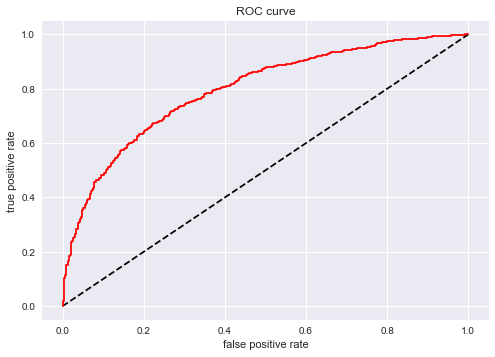

In [212]:
# with test set
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 
              'penalty':['l1', 'l2']}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, c='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

In [213]:
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print('5-fold AUC: {}'.format(cv_auc))

AUC: 0.7955146134608982
5-fold AUC: [ 0.72466052  0.78120792  0.83940128  0.82012663  0.82155502]


### hyperparam tuning with RandomizedSearchCV

> `GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use $`RandomizedSearchCV`$, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.   
  
> `Decision trees` have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for `RandomizedSearchCV`.

In [210]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

    # mine, got wrong
param_dist = {"max_depth":[3, None],
              "max_fetures":randint(1, 9), 
              "min_samples_leaf":randint(1, 9), 
              "criterion":["gini", "entropy"]}                         

    # copy ,got right
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv. fit(X, y)

print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'max_features': 5, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.734381380155


>  Note that `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

# end